In [951]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,Adagrad, AdamW, Adamax, Adadelta,SGD, Adafactor, Nadam
from keras import regularizers
from keras import utils
import time

In [228]:
# Load dataset
df_train= pd.read_csv('train_data_final.csv').drop(columns = "Unnamed: 0")
df_test= pd.read_csv('test_data_final.csv').drop(columns = "Unnamed: 0")

In [229]:
df_train

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,33.883310,0.188470,31.197649,31.198807,31.237043,0.039394,39.990345,28.040092,100.798780,0.000000,...,1.960784,2.061856,0.240000,0.010000,0.225000,0.005000,-53.529380,448,1,1
1,23.442284,0.015231,23.083265,23.519197,23.799660,0.716394,0.000000,0.000000,-0.109734,0.000000,...,3.703704,2.040816,0.080000,0.000000,0.380000,0.000000,-47.326970,448,1,1
2,26.658195,0.095594,24.275490,27.404346,29.017082,4.741592,61.829530,67.673560,20.461290,11.705440,...,3.131991,2.036199,0.344444,0.235472,0.115000,0.087321,-41.121784,448,1,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.333334,0.000000,0.000000,0.000000,0.240000,0.000000,-56.265000,448,1,1
4,34.614662,0.005980,34.433628,34.559757,34.764160,0.330532,8.279264,5.828207,8.208370,6.596444,...,5.084746,1.886793,0.420000,0.000000,0.040000,0.020000,-33.531155,448,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,24.210863,0.074315,22.729614,24.364570,25.552729,2.823114,236.027050,223.026140,17.912342,16.729284,...,3.489532,1.703407,0.431176,0.320769,0.153333,0.149071,-40.205524,445,0,1
13622,24.474560,0.042466,24.111858,24.372028,25.028412,0.916554,267.128230,115.325676,18.977615,8.727659,...,4.854369,3.061225,0.183333,0.023570,0.123333,0.024944,-41.186493,445,0,1
13623,23.050886,0.030502,22.453773,23.070717,23.605549,1.151775,207.237870,124.685500,14.658444,19.092040,...,6.666667,4.761905,0.135000,0.071589,0.055000,0.025000,-42.982080,445,0,1
13624,23.157020,0.085658,20.968218,23.080606,25.493338,4.525120,98.242060,68.553390,23.518658,4.023709,...,4.255319,3.409091,0.143333,0.016997,0.123333,0.023570,-43.327618,445,0,1


In [230]:
# Get a list of all the column names
ColumnNamesList_train = df_train.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList_train:
    total_nas = df_train[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 1
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 1
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 1
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 1
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 1
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 1
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 1
loudness_sma3_amean : 1
loudness_sma3_stddevNorm : 1
loudness_sma3_percentile20.0 : 1
loudness_sma3_percentile50.0 : 1
loudness_sma3_percentile80.0 : 1
loudness_sma3_pctlrange0-2 : 1
loudness_sma3_meanRisingSlope : 1
loudness_sma3_stddevRisingSlope : 1
loudness_sma3_meanFallingSlope : 1
loudness_sma3_stddevFallingSlope : 1
spectralFlux_sma3_amean : 1
spectralFlux_sma3_stddevNorm : 1
mfcc1_sma3_amean : 1
mfcc1_sma3_stddevNorm : 1
mfcc2_sma3_amean : 1
mfcc2_sma3_stddevNorm : 1
mfcc3_sma3_amean : 1
mfcc3_sma3_stddevNorm : 1
mfcc4_sm

In [231]:
# Get a list of all the column names
ColumnNamesList_test = df_test.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList_test:
    total_nas = df_test[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 0
loudness_sma3_amean : 0
loudness_sma3_stddevNorm : 0
loudness_sma3_percentile20.0 : 0
loudness_sma3_percentile50.0 : 0
loudness_sma3_percentile80.0 : 0
loudness_sma3_pctlrange0-2 : 0
loudness_sma3_meanRisingSlope : 0
loudness_sma3_stddevRisingSlope : 0
loudness_sma3_meanFallingSlope : 0
loudness_sma3_stddevFallingSlope : 0
spectralFlux_sma3_amean : 0
spectralFlux_sma3_stddevNorm : 0
mfcc1_sma3_amean : 0
mfcc1_sma3_stddevNorm : 0
mfcc2_sma3_amean : 0
mfcc2_sma3_stddevNorm : 0
mfcc3_sma3_amean : 0
mfcc3_sma3_stddevNorm : 0
mfcc4_sm

In [232]:
# Find index of empty row
nullRow_train = df_train[df_train.isnull().any(axis=1)]


# Remove empty row
df_train = df_train[df_train.index != nullRow_train.index[0]]



In [233]:
# Get a list of all the column names
ColumnNamesList = df_train.columns.values

## Print the number of missing values in all variables
for name in ColumnNamesList:
    total_nas=df_train[name].isna().sum()
    print(name, ":", total_nas)

F0semitoneFrom27.5Hz_sma3nz_amean : 0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm : 0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 : 0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 : 0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 : 0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope : 0
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope : 0
loudness_sma3_amean : 0
loudness_sma3_stddevNorm : 0
loudness_sma3_percentile20.0 : 0
loudness_sma3_percentile50.0 : 0
loudness_sma3_percentile80.0 : 0
loudness_sma3_pctlrange0-2 : 0
loudness_sma3_meanRisingSlope : 0
loudness_sma3_stddevRisingSlope : 0
loudness_sma3_meanFallingSlope : 0
loudness_sma3_stddevFallingSlope : 0
spectralFlux_sma3_amean : 0
spectralFlux_sma3_stddevNorm : 0
mfcc1_sma3_amean : 0
mfcc1_sma3_stddevNorm : 0
mfcc2_sma3_amean : 0
mfcc2_sma3_stddevNorm : 0
mfcc3_sma3_amean : 0
mfcc3_sma3_stddevNorm : 0
mfcc4_sm

In [234]:
# Check for potentially incorrect valuese
df_train.describe()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
count,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,...,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000
mean,25.745292,0.076929,24.278258,25.694211,27.268849,2.990591,82.345260,69.587039,25.355152,22.313180,...,3.971591,2.477241,0.241971,0.112241,0.191788,0.102848,-42.388196,397.119706,0.288587,0.600147
std,7.797542,0.056443,7.584515,7.895070,8.347925,2.703251,121.029574,111.085653,67.914686,62.056042,...,1.650809,1.180545,0.171297,0.099238,0.335345,0.123444,7.192831,51.145327,0.453122,0.489886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-228.022810,0.000000,-734.346100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,303.000000,0.000000,0.000000
25%,21.714222,0.037168,20.299099,21.492850,22.833477,1.353430,15.516853,1.467776,6.568803,1.835006,...,3.043478,1.834862,0.140000,0.016330,0.100000,0.026247,-45.757977,357.000000,0.000000,0.000000
50%,25.459585,0.067140,23.648668,25.291498,27.103271,2.330517,49.589092,30.792398,15.679526,8.580829,...,3.896104,2.419355,0.207174,0.104983,0.142857,0.077037,-41.693493,391.000000,0.000000,1.000000
75%,31.411427,0.103485,30.213726,31.667706,33.141975,3.769505,108.683495,99.414925,26.759731,17.631786,...,4.761905,3.030303,0.296667,0.168688,0.204000,0.144724,-38.288914,443.000000,1.000000,1.000000
max,62.197670,0.571825,62.193268,62.207660,62.210110,43.667380,4072.700200,1975.245400,3777.268300,2007.705900,...,29.166668,25.000000,2.450000,1.125000,10.429999,3.449389,-17.723944,491.000000,1.000000,1.000000


In [235]:
# Calculate the percentage of zero values in each row
zero_percentages = (df_train == 0).mean(axis=1)

# Filter out rows where more than half of the feature values are zero
threshold = 0.5  # More than half
df = df_train[zero_percentages <= threshold]

# Check if any rows are duplicated
df_train[df_train.duplicated()] # No rows are duplicated

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender


In [236]:
# Extract X variables
X_train = df_train.drop(columns=["Depression", "Gender", "Participant_ID"])
X_test = df_test.drop(columns=["Depression", "Gender", "Participant_ID"])
# Extract y variables
y_train = df_train[["Depression", "Gender", "Participant_ID"]]
y_test = df_test[["Depression", "Gender", "Participant_ID"]]

In [237]:
# Standardize X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

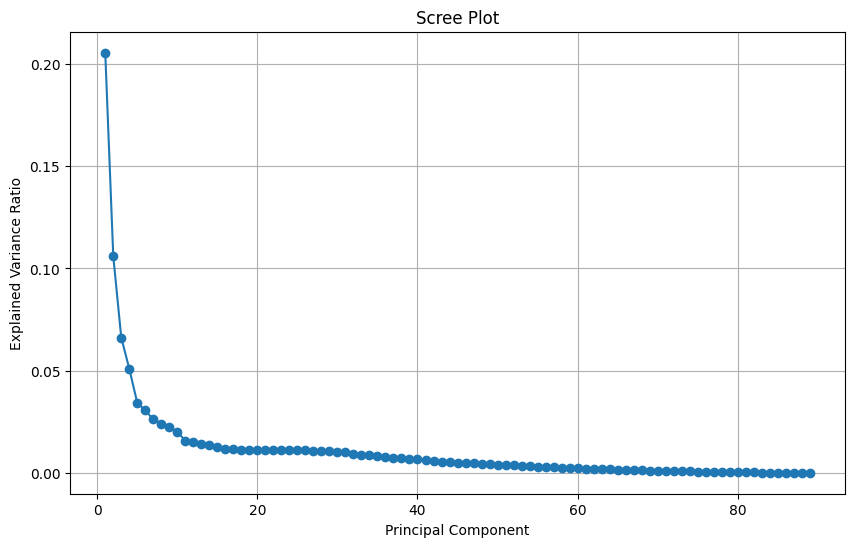

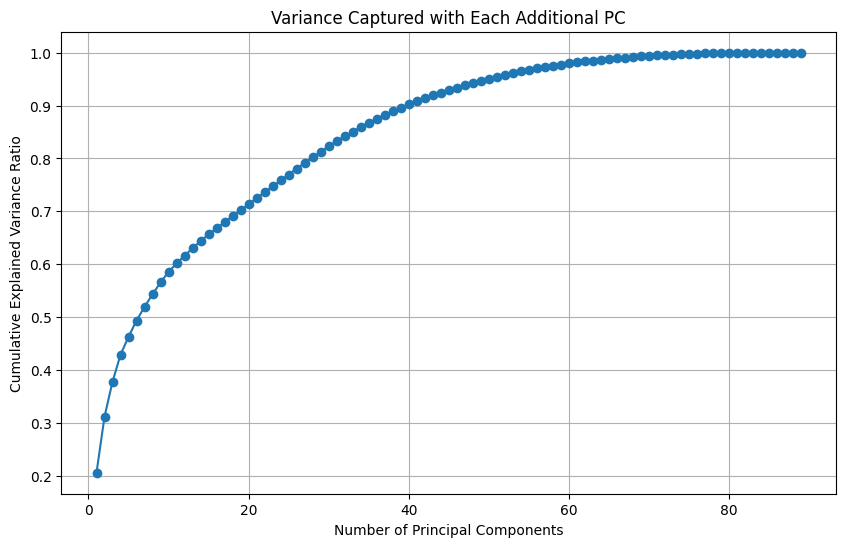

In [12]:


# Perform PCA
pca = PCA()
X_PCA = pca.fit_transform(X_scaled)

# Calculate explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.savefig('scree')
plt.show()

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot variance captured with each additional PC
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Variance Captured with Each Additional PC')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.savefig('PCACumulative')
plt.show()

In [13]:
# Create a df for selected principal components

numPCs = 20 # select 20 PCs based on Scree Plot

X_pca_subset = X_PCA[:, :numPCs]

columns = [f"PC{i+1}" for i in range(20)]
X_PCA_df = pd.DataFrame(X_pca_subset, columns=columns)

# Concatenate X_pca_df and y to get the final DataFrame
PCA_df = pd.concat([X_PCA_df.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

NameError: name 'y' is not defined

In [ ]:
df.to_csv('clean_df.csv')
PCA_df.to_csv('PCA_df.csv')

In [238]:
X_train,X_val,y_train_new,y_val = train_test_split(X_scaled, y_train, test_size=0.15,random_state=3)

In [98]:
rf = RandomForestClassifier(max_depth=7,random_state=3,n_estimators=500)
rf.fit(X_train, np.array(y_train_new["Depression"]))

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=3)

In [99]:
y_pred = rf.predict(X_val)


In [100]:
y_val["Y_pred_val"] = y_pred

In [101]:
metrics.accuracy_score(np.array(y_val.groupby("Participant_ID").agg({"Depression":"max"})["Depression"]),np.array(y_val.groupby("Participant_ID").agg({"Y_pred_val":"max"})["Y_pred_val"]))

0.735632183908046

In [102]:
rf = RandomForestClassifier(max_depth=7,random_state=3,n_estimators=500)
rf.fit(X_scaled, np.array(y_train["Depression"]))

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=3)

In [103]:
y_pred = rf.predict(X_scaled_test)
y_test["Test_pred"] = y_pred

/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_58996/560069950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Test_pred"] = y_pred


In [104]:

metrics.accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"max"})["Depression"]),np.array(y_test.groupby("Participant_ID").agg({"Test_pred":"max"})["Test_pred"]))

0.5

In [105]:
metrics.balanced_accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"max"})["Depression"]),np.array(y_test.groupby("Participant_ID").agg({"Test_pred":"max"})["Test_pred"]))

0.40476190476190477

In [239]:
X_train.shape

(11581, 88)

In [366]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
start_time = time.time()
trained_model = model3.fit(X_train, np.array(y_train_new["Depression"]), 
                           epochs=25,batch_size=16, 
                           validation_data=(X_val, np.array(y_val["Depression"])),
                           class_weight = {0: 0.7, 1: 2})
end_time = time.time()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 32)                2848      
                                                                 
 dense_153 (Dense)           (None, 32)                1056      
                                                                 
 dense_154 (Dense)           (None, 16)                528       
                                                                 
 dense_155 (Dense)           (None, 1)                 17        
                                                                 
Total params: 4449 (17.38 KB)
Trainable params: 4449 (17.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
724/724 [==============================] - 1s 549us/step - loss: 0.7291 - accuracy: 0.6203 - val_loss: 0.6628 - val_accuracy: 0.6737
Epoch 2/25
724/724 [==============================] - 0s 450us/step - loss: 0.6204 - accuracy: 0.7228 - val_loss: 0.6368 - val_accuracy: 0.7055
Epoch 3/25
724/724 [==============================] - 0s 449us/step - loss: 0.5486 - accuracy: 0.7669 - val_loss: 0.5587 - val_accuracy: 0.7661
Epoch 4/25
724/724 [==============================] - 0s 498us/step - loss: 0.5004 - accuracy: 0.7909 - val_loss: 0.5077 - val_accuracy: 0.7813
Epoch 5/25
724/724 [==============================] - 0s 430us/step - loss: 0.4655 - accuracy: 0.8102 - val_loss: 0.4924 - val_accuracy: 0.7852
Epoch 6/25
724/724 [==============================] - 0s 433us/step - loss: 0.4402 - accuracy: 0.8238 - val_loss: 0.4714 - val_accuracy: 0.8048
Epoch 7/25
724/724 [==============================] - 0s 431us/step - loss: 0.4209 - accuracy: 0.8308 - val_loss: 0.4552 - val_accuracy:

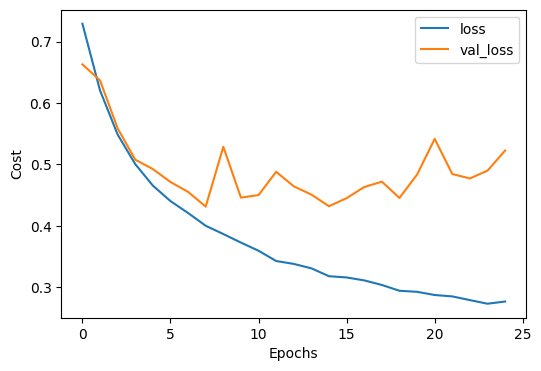

In [367]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["loss"], label="loss")
plt.plot(trained_model.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

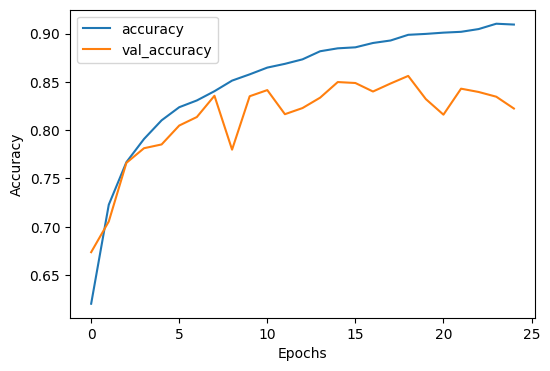

In [368]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [369]:

test_loss, test_acc = model3.evaluate(X_scaled_test,  np.array(y_test["Depression"]))
print("Test loss: ", test_loss)
print("Test accuracy: ", test_acc)

103/103 [==============================] - 0s 332us/step - loss: 1.5429 - accuracy: 0.5966
Test loss:  1.542932152748108
Test accuracy:  0.5966463685035706


In [370]:
y_pred = model3.predict(X_scaled_test)
y_test["Test_pred"] = np.where(y_pred>=0.5,1,0)

103/103 [==============================] - 0s 548us/step


/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_58996/3147699589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Test_pred"] = np.where(y_pred>=0.5,1,0)


In [371]:
metrics.accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))

0.75

In [372]:
metrics.balanced_accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean3456"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] > 0.5).astype(int)))

0.7261904761904762

Confusion Matrix 
 [[11  3]
 [ 2  4]]


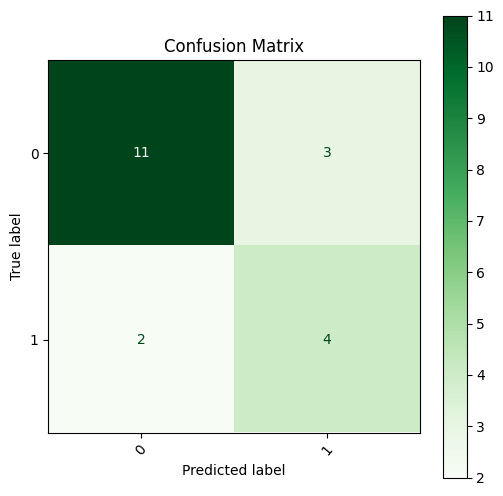

In [373]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

conf_matrix = confusion_matrix(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))
print("Confusion Matrix \n", conf_matrix)

#Visualizing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
display_c_m = ConfusionMatrixDisplay(conf_matrix)
display_c_m.plot(cmap='Greens', xticks_rotation=50)
plt.title('Confusion Matrix')
plt.show()

In [294]:
y_train.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"].value_counts()

Depression
0.0    63
1.0    24
Name: count, dtype: int64

In [1034]:
train_new = pd.read_csv("selected_train.csv").drop(columns = "Unnamed: 0")
test_new = pd.read_csv("selected_test.csv").drop(columns = ["Unnamed: 0.1","Unnamed: 0"])

In [638]:
train_new.dropna(axis="rows",how="any",inplace=True)
train_new.isna().sum()

F0semitoneFrom27.5Hz_sma3nz_stddevNorm           0
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2         0
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope      0
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope    0
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope     0
                                                ..
StddevUnvoicedSegmentLength                      0
equivalentSoundLevel_dBp                         0
Participant_ID                                   0
Depression                                       0
Gender                                           0
Length: 64, dtype: int64

In [646]:
# Extract X variables
X_train = train_new.drop(columns=["Depression", "Gender", "Participant_ID"])
X_test = test_new.drop(columns=["Depression", "Gender", "Participant_ID"])
# Extract y variables
y_train = train_new[["Depression", "Gender", "Participant_ID"]]
y_test = test_new[["Depression", "Gender", "Participant_ID"]]

In [647]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((3280, 61), (13625, 61), (13625, 3), (3280, 3))

In [648]:
# Standardize X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [629]:
# X_train,X_val,y_train_new,y_val = train_test_split(X_scaled, y_train, test_size=0.15,random_state=3)

In [974]:
import keras

In [1042]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],),kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Nadam(learning_rate=0.001),metrics=["accuracy"])
start_time = time.time()
trained_model = model3.fit(X_scaled, np.array(y_train["Depression"]), 
                           epochs=50,batch_size=32, 
                           validation_data=(X_scaled_test, np.array(y_test["Depression"])),
                           class_weight = {0: 1, 1: 4})
end_time = time.time()

Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_559 (Dense)           (None, 32)                1984      
                                                                 
 dense_560 (Dense)           (None, 16)                528       
                                                                 
 dense_561 (Dense)           (None, 8)                 136       
                                                                 
 dense_562 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
426/426 [==============================] - 2s 696us/step - loss: 1.3411 - accuracy: 0.4394 - val_loss: 0.7595 - val_accuracy: 0.2253
Epoch 2/50
426/426 [==============================] - 0s 517us/step - loss: 1.2351 - accuracy: 0.3949 - val_loss: 0.7815 - val_accuracy: 0.3210
Epoch 3/50
426/426 [==============================] - 0s 510us/step - loss: 1.1579 - accuracy: 0.5172 - val_loss: 0.7301 - val_accuracy: 0.4561
Epoch 4/50
426/426 [==============================] - 0s 509us/step - loss: 1.0691 - accuracy: 0.5991 - val_loss: 0.7654 - val_accuracy: 0.4390
Epoch 5/50
426/426 [==============================] - 0s 508us/step - loss: 0.9947 - accuracy: 0.6404 - val_loss: 0.7772 - val_accuracy: 0.4799
Epoch 6/50
426/426 [==============================] - 0s 511us/step - loss: 0.9342 - accuracy: 0.6702 - val_loss: 0.8151 - val_accuracy: 0.4771
Epoch 7/50
426/426 [==============================] - 0s 504us/step - loss: 0.8884 - accuracy: 0.6947 - val_loss: 0.8473 - val_accuracy:

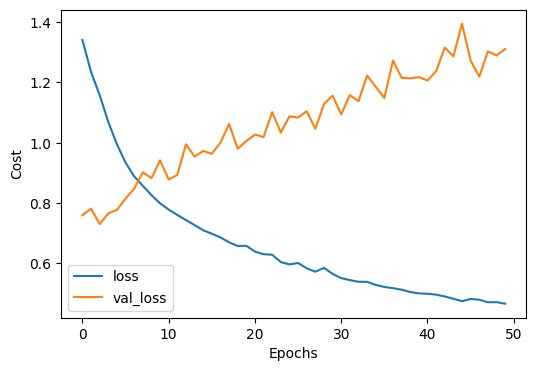

In [1043]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["loss"], label="loss")
plt.plot(trained_model.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

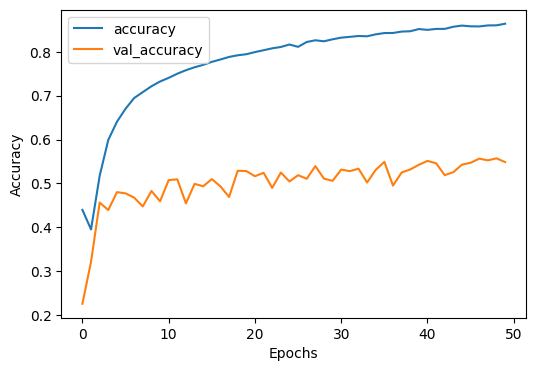

In [1044]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1045]:
y_pred = model3.predict(X_scaled_test)
y_test["Test_pred"] = np.where(y_pred>=0.5,1,0)

103/103 [==============================] - 0s 655us/step


In [1046]:
metrics.accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))

0.7

In [1047]:
metrics.balanced_accuracy_score(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] > 0.5).astype(int)))

0.6904761904761905

Confusion Matrix 
 [[10  4]
 [ 2  4]]


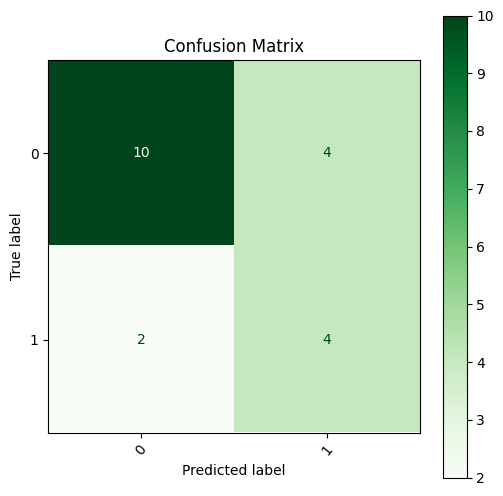

In [1048]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

conf_matrix = confusion_matrix(np.array(y_test.groupby("Participant_ID").agg({"Depression":"mean"})["Depression"]),np.array((y_test.groupby("Participant_ID").agg({"Test_pred":"mean"})["Test_pred"] >= 0.5).astype(int)))
print("Confusion Matrix \n", conf_matrix)

#Visualizing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
display_c_m = ConfusionMatrixDisplay(conf_matrix)
display_c_m.plot(cmap='Greens', xticks_rotation=50)
plt.title('Confusion Matrix')
plt.show()